In [1]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Explanation of Issues:
1- **Missing Values**: Look at the bar chart where higher bars indicate more missing data.
2- **Duplicates**: The bar chart shows IDs that appear more than once.
3- **Inconsistent Dates**: Notice dates from different years, including potentially outdated information.
4- **Category Issues**: Categories with low counts might indicate typos or rare categories.
5- **Currency Issues**: Pie chart shows unexpected currencies.
6- **Amount Anomalies**: Boxplot highlights outliers or extreme values.
7- **Description Issues**: Histogram of lengths shows uniformity problems; check for typos in text.
8- **Bias**: Histogram of amounts might show skewness due to extreme values.
9- **Data Integrity**: IDs should be unique; the histogram shows how often IDs repeat.


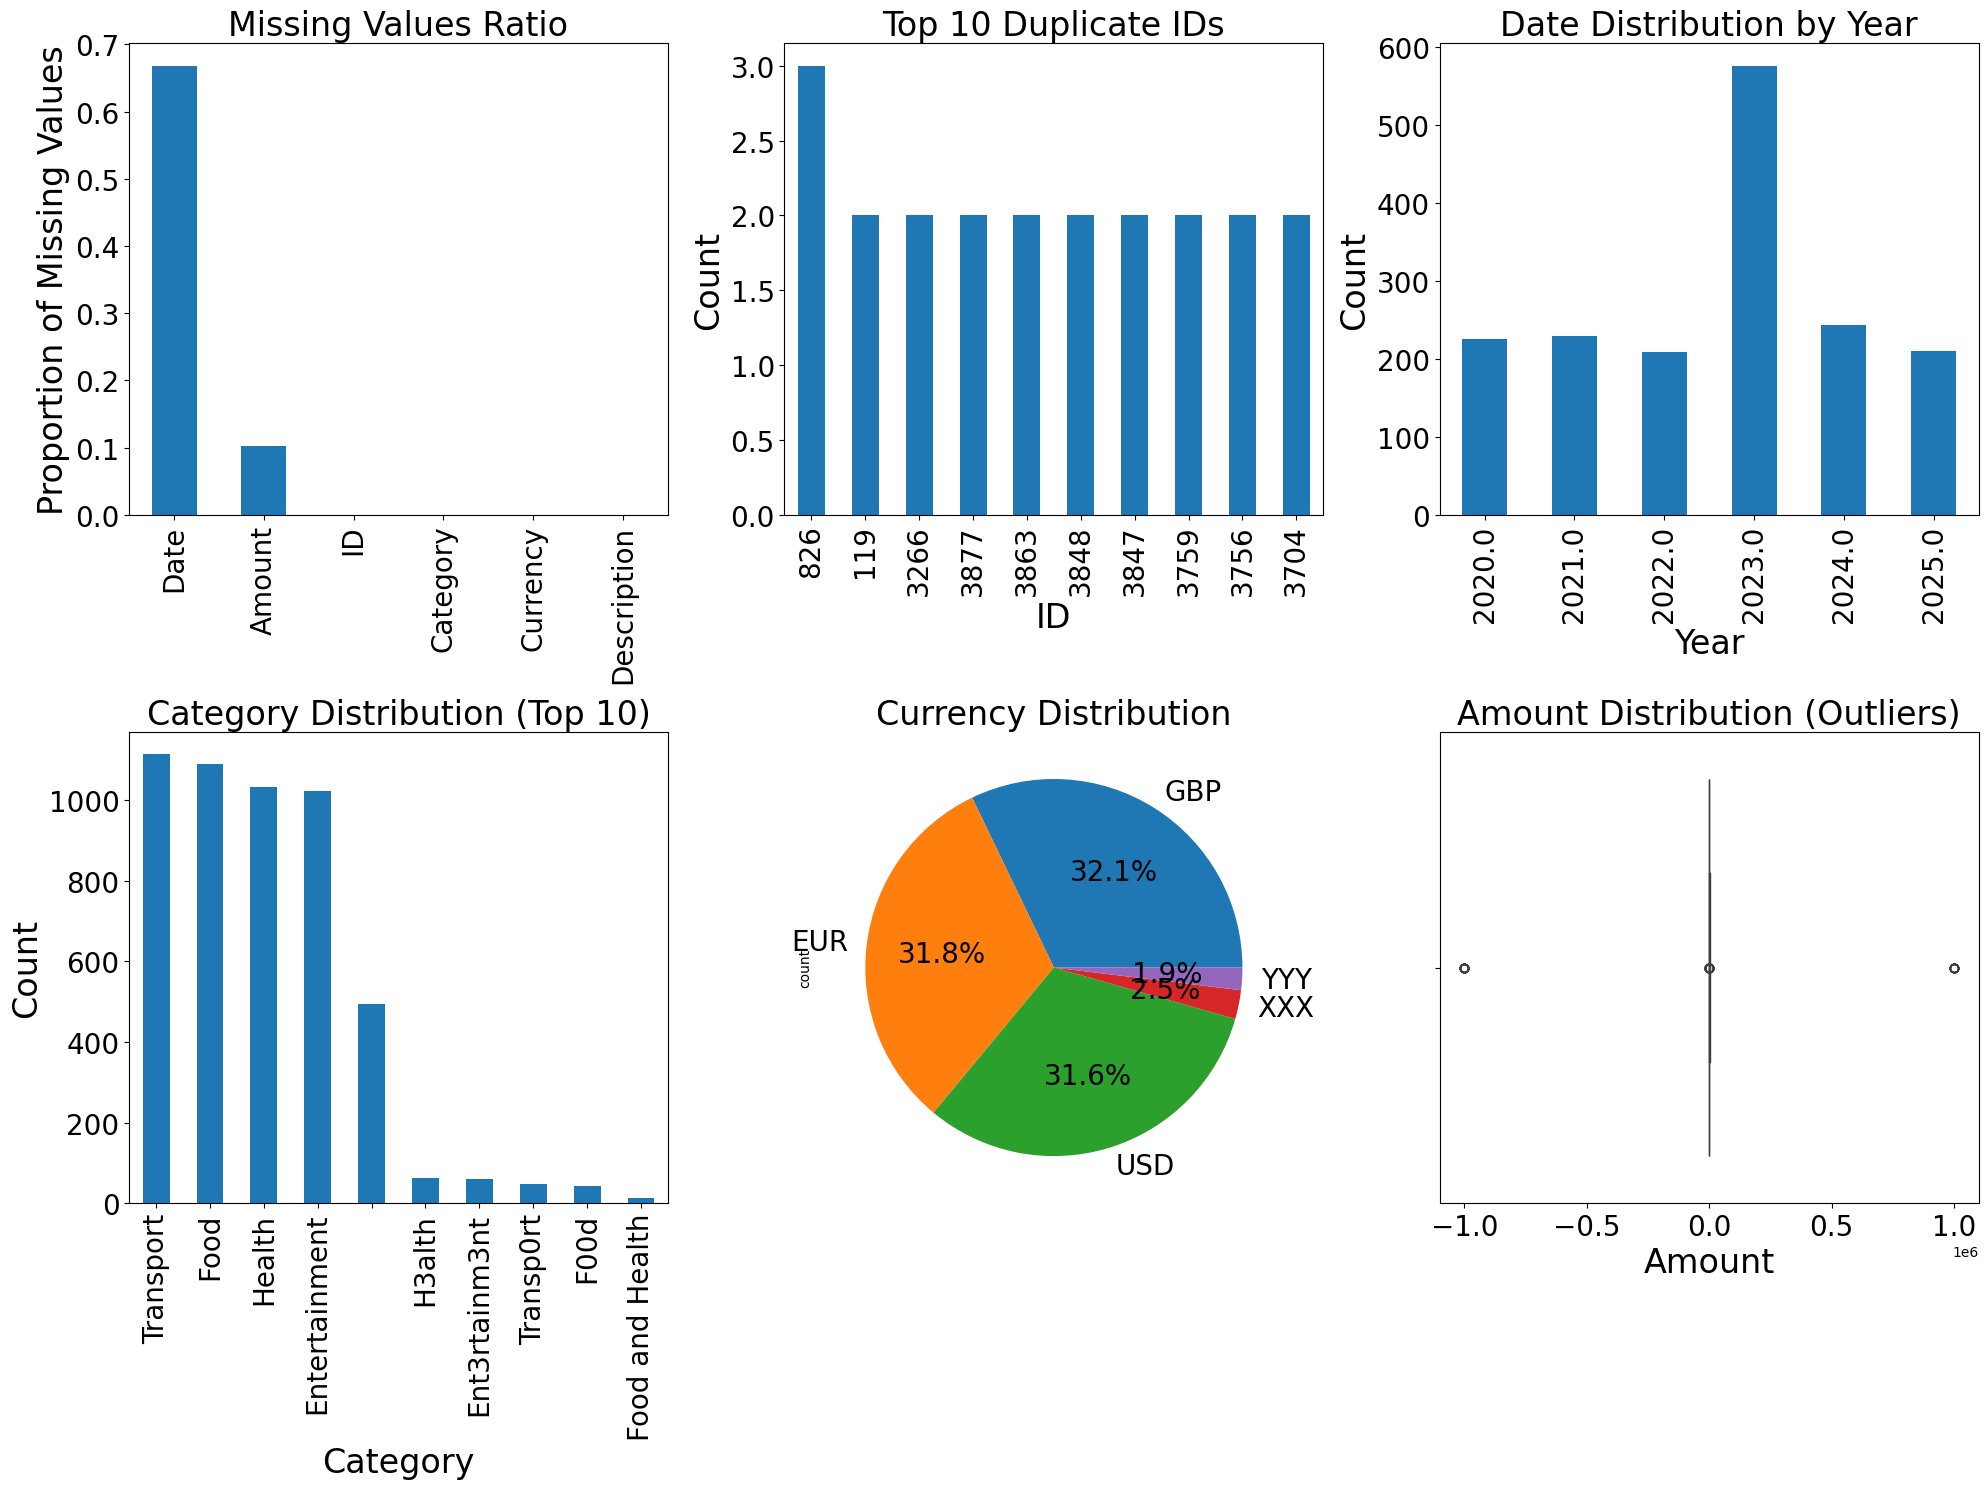

In [6]:
def create_enhanced_poor_quality_data(n=5000):
    data = {
        'ID': list(range(n)),  # Unique identifier
        'Date': [],
        'Amount': [],
        'Category': [],
        'Currency': [],
        'Description': []
    }

    categories = ['Food', 'Transport', 'Entertainment', 'Health']
    currencies = ['USD', 'EUR', 'GBP']
    current_year = datetime.now().year

    for i in range(n):
        # Date with inconsistent formats and outdated information
        if random.random() < 0.2:
            date = np.random.choice(['01/01/2023', '2023-01-01', 'Jan 01, 2023'])
        else:
            date = datetime(current_year - random.randint(0, 5), random.randint(1, 12), random.randint(1, 28))  # Some outdated dates
            date = date.strftime(random.choice(['%m/%d/%Y', '%Y-%m-%d', '%b %d, %Y']))
        
        # Amount with inaccuracies, missing values, and extreme values
        if random.random() < 0.1:
            amount = np.nan  # Missing value
        else:
            amount = round(random.uniform(0, 1000), 2)
            if random.random() < 0.05:  # Introduce inaccuracies
                amount *= random.choice([-1, 1.5, 0.5])
            if random.random() < 0.01:  # Extreme values for bias
                amount = random.choice([1000000, -1000000])
        
        # Category with typos, missing entries, and ambiguity
        if random.random() < 0.1:
            category = ''  # Missing category
        else:
            category = random.choice(categories)
            if random.random() < 0.05:  # Introduce typos
                category = category.replace('o', '0').replace('e', '3')
            if random.random() < 0.03:  # Ambiguity - mixed categories
                category += ' and ' + random.choice(categories)
        
        # Currency with inconsistencies
        currency = random.choice(currencies)
        if random.random() < 0.05:
            currency = random.choice(['XXX', 'YYY'])  # Unknown or incorrect currency
        
        # Description with data entry errors and lack of uniformity
        if random.random() < 0.1:
            description = ''  # Missing description
        else:
            description = f"Purchase of {category.lower()} item in {random.choice(['New York', 'London', 'Tokyo'])}"
            if random.random() < 0.05:  # Introduce typographical errors
                description = description.replace('e', '3').replace('o', '0')
            if random.random() < 0.05:  # Lack of uniformity in capitalization
                description = description.upper()
        
        data['Date'].append(date)
        data['Amount'].append(amount)
        data['Category'].append(category)
        data['Currency'].append(currency)
        data['Description'].append(description)

    # Introduce duplicates and data integrity issues
    for _ in range(100):
        idx = random.randint(0, n-1)
        data['ID'].append(data['ID'][idx])  # Duplicate ID
        data['Date'].append(data['Date'][idx])
        data['Amount'].append(data['Amount'][idx])
        data['Category'].append(data['Category'][idx])
        data['Currency'].append(data['Currency'][idx])
        data['Description'].append(data['Description'][idx])

    return pd.DataFrame(data)

df = create_enhanced_poor_quality_data()
# Ensure all date entries are Python strings
df['Date'] = df['Date'].apply(lambda x: str(x))

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Create a single figure with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(20, 15))

# 1. Missing Values
df.isnull().mean().sort_values(ascending=False).plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Missing Values Ratio', fontsize=24)
axes[0, 0].set_ylabel('Proportion of Missing Values', fontsize=24)
axes[0, 0].tick_params(axis='x', labelsize=20)
axes[0, 0].tick_params(axis='y', labelsize=20)

# 2. Duplicates
duplicates = df[df.duplicated(subset='ID', keep=False)]
duplicates['ID'].value_counts().head(10).plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Top 10 Duplicate IDs', fontsize=24)
axes[0, 1].set_xlabel('ID', fontsize=24)
axes[0, 1].set_ylabel('Count', fontsize=24)
axes[0, 1].tick_params(axis='x', labelsize=20)
axes[0, 1].tick_params(axis='y', labelsize=20)

# 3. Date Distribution by Year
df['Date'].dt.year.value_counts().sort_index().plot(kind='bar', ax=axes[0, 2])
axes[0, 2].set_title('Date Distribution by Year', fontsize=24)
axes[0, 2].set_xlabel('Year', fontsize=24)
axes[0, 2].set_ylabel('Count', fontsize=24)
axes[0, 2].tick_params(axis='x', labelsize=20)
axes[0, 2].tick_params(axis='y', labelsize=20)

# 4. Category Distribution
df['Category'].value_counts().head(10).plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Category Distribution (Top 10)', fontsize=24)
axes[1, 0].set_xlabel('Category', fontsize=24)
axes[1, 0].set_ylabel('Count', fontsize=24)
axes[1, 0].tick_params(axis='x', labelsize=20)
axes[1, 0].tick_params(axis='y', labelsize=20)

# 5. Currency Distribution
df['Currency'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1, 1], textprops={'fontsize': 20})
axes[1, 1].set_title('Currency Distribution', fontsize=24)
axes[1, 1].tick_params(axis='x', labelsize=20)
axes[1, 1].tick_params(axis='y', labelsize=20)

# 6. Amount Distribution (Outliers)
sns.boxplot(x=df['Amount'], ax=axes[1, 2])
axes[1, 2].set_title('Amount Distribution (Outliers)', fontsize=24)
axes[1, 2].set_xlabel('Amount', fontsize=24)
axes[1, 2].tick_params(axis='x', labelsize=20)
axes[1, 2].tick_params(axis='y', labelsize=20)


print("Explanation of Issues:")
print("1- **Missing Values**: Look at the bar chart where higher bars indicate more missing data.")
print("2- **Duplicates**: The bar chart shows IDs that appear more than once.")
print("3- **Inconsistent Dates**: Notice dates from different years, including potentially outdated information.")
print("4- **Category Issues**: Categories with low counts might indicate typos or rare categories.")
print("5- **Currency Issues**: Pie chart shows unexpected currencies.")
print("6- **Amount Anomalies**: Boxplot highlights outliers or extreme values.")

# Adjust layout
plt.tight_layout()
plt.show()


# **a) Poor Quality in structured data**

<font size="3">The dataset was simulated using Python to include common data quality issues like missing values, duplicates, inconsistent date formats, typos in categories, irrelevant or outdated information, and extreme values. </font>

<font size="3">To recognize poor quality, look for:</font>
- <font size="3">**Missing entries** in key fields like 'Amount'.</font>
- <font size="3">**Duplicates** where IDs are repeated.</font>
- <font size="3">**Inconsistent formatting** of dates or categories (e.g., "F00d" instead of "Food").</font>
- <font size="3">**Outliers** or unexpected values in numerical data like 'Amount'.</font>
- <font size="3">**Currency or category anomalies** where unfamiliar or mixed entries exist.</font>

# **b) How the Data Fails to Include Properties of Good Quality Data**

<font size="3">- This dataset lacks **completeness** due to numerous missing values, particularly in essential fields like 'Amount' and 'Category'.</font>

<font size="3">- **Consistency** is compromised with mixed date formats and typographical errors in category names, making data interpretation challenging.</font>

<font size="3">- **Accuracy** is questionable with extreme values that don't match real-world financial transactions, suggesting possible errors or biases.</font>

<font size="3">- There's a clear absence of **uniqueness** with duplicate IDs and descriptions that vary in length and format, undermining data integrity.</font>

# Unestructured data

In [1]:
from faker import Faker
import pandas as pd
import random
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime

fake = Faker()

def create_poor_quality_unstructured_data(n=5000):
    data = {
        'Text': []
    }

    for _ in range(n):
        sentence = []
        
        # Date
        if random.random() < 0.8:
            sentence.append(fake.date_this_decade())
        else:
            sentence.append(fake.date_between_dates(date_start=datetime(2000, 1, 1), date_end=datetime(2010, 12, 31)))
        
        # Category with some noise
        category = fake.word().capitalize()
        if random.random() < 0.1:
            category = category.replace('a', '@').replace('e', '3')
        sentence.append(category)
        
        # Amount with potential inaccuracies
        # Ensure min_value is positive when positive=True
        amount = fake.pyfloat(right_digits=2, positive=True, min_value=0.01, max_value=1000)
        if random.random() < 0.05:
            amount *= random.choice([-1, 1.5, 0.5])
        sentence.append(f"${amount}")
        
        # Location
        if random.random() < 0.9:
            sentence.append(fake.city())
        else:
            sentence.append("Unknown")
        
        # Combine into unstructured text with errors
        combined_text = " ".join(map(str, sentence))
        if random.random() < 0.1:  # Introduce missing data
            combined_text = ''
        if random.random() < 0.05:  # Introduce typos
            combined_text = combined_text.replace('e', '3').replace('o', '0')
        if random.random() < 0.1:  # Introduce duplicate sentences
            combined_text += ' ' + combined_text
        
        data['Text'].append(combined_text)

    return pd.DataFrame(data)

df_unstructured = create_poor_quality_unstructured_data()

# Now you can proceed with the analysis and visualization

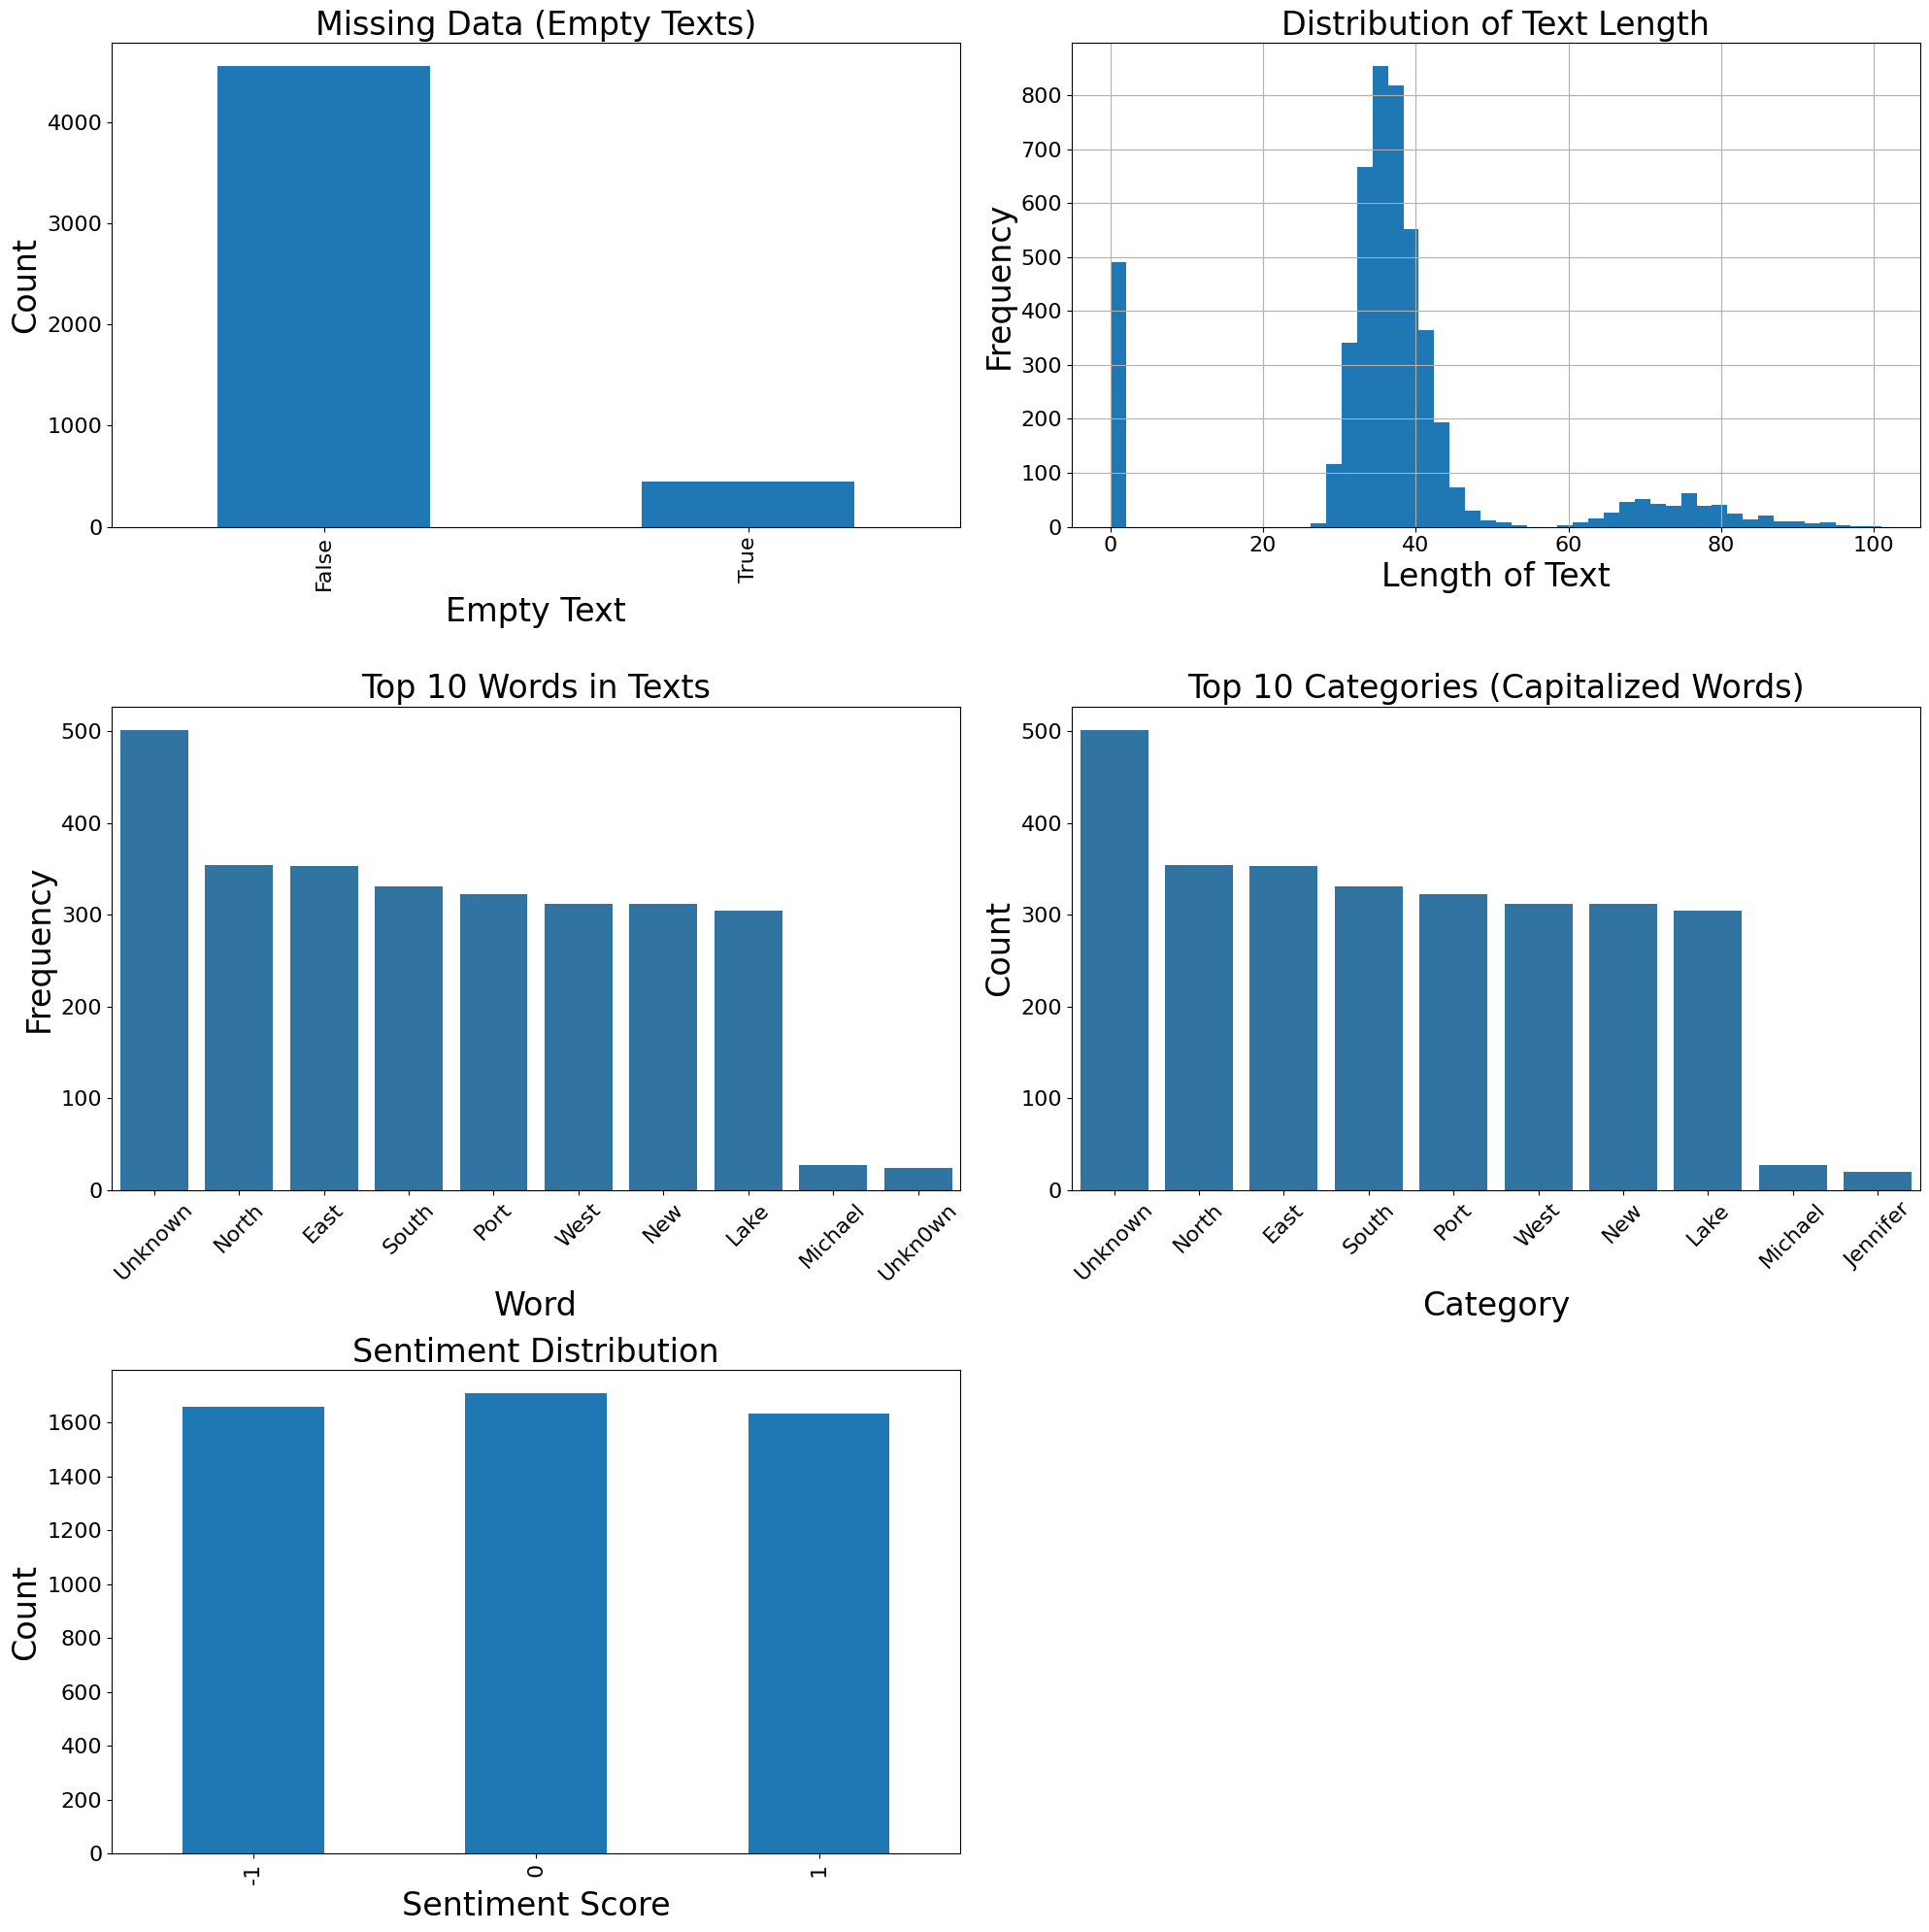

Explanation of Issues:
- **Missing Data**: Presence of completely empty texts shows data loss or entry issues.
- **Text Length**: Wide variation indicates inconsistent data entry or information level.
- **Word Frequency**: Highlights common terms, potentially including errors or noise.
- **Categories**: Shows the diversity of topics or the noise in categorization.
- **Sentiment**: A simplistic view of sentiment, suggesting varied emotional content.


In [4]:
def analyze_and_visualize_unstructured_data(df):
    plt.figure(figsize=(20, 20))

    # Missing Data (empty texts)
    plt.subplot(3, 2, 1)
    empty_texts = df['Text'].apply(len) == 0
    empty_texts.value_counts().plot(kind='bar')
    plt.title('Missing Data (Empty Texts)', fontsize=24)
    plt.xlabel('Empty Text', fontsize=24)
    plt.ylabel('Count', fontsize=24)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    # Length of Texts
    plt.subplot(3, 2, 2)
    df['Text'].str.len().hist(bins=50)
    plt.title('Distribution of Text Length', fontsize=24)
    plt.xlabel('Length of Text', fontsize=24)
    plt.ylabel('Frequency', fontsize=24)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    # Word Frequency Analysis
    all_words = ' '.join(df['Text']).split()
    word_counts = Counter(all_words)
    plt.subplot(3, 2, 3)
    sns.barplot(x=[k for k, _ in word_counts.most_common(10)], y=[v for _, v in word_counts.most_common(10)])
    plt.title('Top 10 Words in Texts', fontsize=24)
    plt.xlabel('Word', fontsize=24)
    plt.ylabel('Frequency', fontsize=24)
    plt.xticks(rotation=45, fontsize=16)
    plt.yticks(fontsize=16)

    # Categories (Using words as pseudo-categories)
    categories = [word for word in all_words if word.istitle()]
    plt.subplot(3, 2, 4)
    category_counts = Counter(categories)
    sns.barplot(x=[k for k, _ in category_counts.most_common(10)], y=[v for _, v in category_counts.most_common(10)])
    plt.title('Top 10 Categories (Capitalized Words)', fontsize=24)
    plt.xlabel('Category', fontsize=24)
    plt.ylabel('Count', fontsize=24)
    plt.xticks(rotation=45, fontsize=16)
    plt.yticks(fontsize=16)

    # Sentiment Analysis (simplified)
    sentiment_scores = [random.choice([-1, 0, 1]) for _ in range(len(df))]  # Placeholder for real sentiment analysis
    plt.subplot(3, 2, 5)
    df['Sentiment'] = sentiment_scores
    df['Sentiment'].value_counts().sort_index().plot(kind='bar')
    plt.title('Sentiment Distribution', fontsize=24)
    plt.xlabel('Sentiment Score', fontsize=24)
    plt.ylabel('Count', fontsize=24)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    plt.tight_layout()
    plt.show()

    # Explanations:
    print("Explanation of Issues:")
    print("- **Missing Data**: Presence of completely empty texts shows data loss or entry issues.")
    print("- **Text Length**: Wide variation indicates inconsistent data entry or information level.")
    print("- **Word Frequency**: Highlights common terms, potentially including errors or noise.")
    print("- **Categories**: Shows the diversity of topics or the noise in categorization.")
    print("- **Sentiment**: A simplistic view of sentiment, suggesting varied emotional content.")

analyze_and_visualize_unstructured_data(df_unstructured)

# **c) Provide an Example of Poor Quality Unstructured Data.**


<font size="3">The dataset uses Faker to simulate unstructured text with issues like missing information, typos, inconsistent data formatting, and duplicates. This mimics real-world scenarios where data entry errors or system issues might occur.</font>

<font size="3">To recognize poor quality, look for:</font>
- <font size="3">**Empty texts**, indicating data is missing or was not entered.</font>
- <font size="3">**Inconsistent text lengths**, which might suggest varied detail or data entry practices.</font>
- <font size="3">**Frequent words** that might include errors or noise, like "$" with incorrect or extreme values.</font>
- <font size="3">**Unusual or capitalized words** that could be intended categories but are mixed with regular text.</font>
- <font size="3">**Sentiment variations**, where even a simple analysis shows a range from negative to positive, indicating possible noise or diverse content.</font>

# **d) How the Data Fails to Include Properties of Good Quality Data**

<font size="3">- **Completeness** is compromised with numerous empty texts or missing key information like dates or locations.</font>

<font size="3">- **Consistency** is lacking due to varied formatting of dates, numbers, and the presence of typographical errors.</font>

<font size="3">- **Accuracy** is questionable with potential errors in amounts or dates, where values might not make sense in context.</font>

<font size="3">- **Uniqueness** is absent with some texts being duplicated, suggesting a lack of data cleaning or integrity checks.</font>